In [ ]:
import numpy as np #calculation of lenear Algebra
import pandas as pd #data frame (data processing, CSV file I/O) (e.g. pd.read_csv)
import seaborn as sns #data visualization
from matplotlib import pyplot as plt #data visualization
%matplotlib inline
import os #interact with the underlying operating system
# supress/hide warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PDFMalware2022.csv")
df

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [ ]:
df.isnull().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#drop any row even having one null value
new_df=df.dropna(axis=0,how='any')

In [ ]:
new_df.isnull().sum()

Fine name           0
pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              0
text                0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
Colors              0
Class               0
dtype: int64

In [ ]:
print("Old Dataframe length: ", len(df))
print("New Dataframe lenght: ", len(new_df))
print("Number of rows with at least 1 Null Values: ",(len(df)-len(new_df)))

Old Dataframe length:  10026
New Dataframe lenght:  10023
Number of rows with at least 1 Null Values:  3


In [ ]:
new_df.duplicated().sum()

0

In [1]:
new_df['Class'].value_counts().plot.bar()

NameError: ignored

In [ ]:
new_df['Class'].value_counts()

Malicious    5555
Benign       4468
Name: Class, dtype: int64

 Convert "Malicious" as "1" & "Benign" as "0" in "Class" Column

In [ ]:
df1=new_df

In [ ]:
df1['Class'].replace(['Malicious','Benign'],[1,0],inplace=True)

In [ ]:
df1['Class'].value_counts()

1    5555
0    4468
Name: Class, dtype: int64

In [ ]:
display(df1.dtypes['Class'])

dtype('int64')

In [ ]:
df1['text'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10023 entries, 0 to 10025
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
10023 non-null  object
dtypes: object(1)
memory usage: 156.6+ KB


In [ ]:
df1['text'].value_counts()

No         5398
Yes        3761
unclear     549
-1          302
0            13
Name: text, dtype: int64

Here 'Yes' means the presence of text inside the file and 'No' menas the absence of text inside the file & 'unclear' means presnce/absence about the text inside the file is not clear, may be hidden
Here '-1' & '0' doesn't mean any thing. So, drop those rows who have the presence of '-1' & '0' in 'text' coloumn

In [ ]:
df1=df1[df1.text!='-1']
df1=df1[df1.text!='0']

In [ ]:
df1['text'].value_counts()

No         5398
Yes        3761
unclear     549
Name: text, dtype: int64

 Convert "Yes" as "1" & "No" as "0" & "unclear" as "2" in "text" Column

---



---



In [ ]:
df1['text'].replace(['No','Yes','unclear', '-1', '0'],[0,1,2,3,4],inplace=True)

In [ ]:
df1['text'].value_counts()

0    5398
1    3761
2     549
Name: text, dtype: int64

Drop unnecessary columns for this reaserch

In [ ]:
df2=df1

In [ ]:
df2.drop(['Fine name','pdfsize','metadata size','pages','encrypt','pageno','title characters','images','header','obj','endobj','embedded files','EmbeddedFile','Colors'],inplace=True,axis=1)
#df2.drop(['Fine name','pageno','AA','JBIG2Decode', 'launch','encrypt','embedded files', 'isEncrypted', 'RichMedia', 'Acroform','EmbeddedFile','title characters','Colors'],inplace=True,axis=1)
#df2.drop(['pageno','AA','JBIG2Decode', 'launch','encrypt','embedded files', 'isEncrypted', 'RichMedia', 'Acroform','EmbeddedFile','title characters','Colors'],inplace=True,axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9708 entries, 0 to 10025
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   xref Length  9708 non-null   float64
 1   isEncrypted  9708 non-null   float64
 2   text         9708 non-null   int64  
 3   stream       9708 non-null   float64
 4   endstream    9708 non-null   object 
 5   xref         9708 non-null   object 
 6   trailer      9708 non-null   float64
 7   startxref    9708 non-null   object 
 8   ObjStm       9708 non-null   float64
 9   JS           9708 non-null   object 
 10  Javascript   9708 non-null   object 
 11  AA           9708 non-null   object 
 12  OpenAction   9708 non-null   object 
 13  Acroform     9708 non-null   object 
 14  JBIG2Decode  9708 non-null   object 
 15  RichMedia    9708 non-null   object 
 16  launch       9708 non-null   object 
 17  XFA          9708 non-null   object 
 18  Class        9708 non-null   int64  
dtypes: fl

Machine Learning

Preporcessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#import pandas_profiling as pp

from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2 = df2.apply(le.fit_transform)
df2.describe()

,xref Length,isEncrypted,text,stream,endstream,xref,trailer,startxref,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,XFA,Class
count,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000
mean,115.503193,0.007108,0.500515,17.826535,105.053255,3.662855,2.190152,4.114442,2.471673,2.662546,4.013082,1.173877,1.265863,1.414916,1.008344,0.951483,0.958076,0.999588,0.540173
std,212.536648,0.084010,0.602611,29.794167,68.524110,3.336731,1.096506,3.246887,4.652211,4.007314,5.707161,2.169316,0.596926,0.945007,0.757390,0.257203,0.264662,0.355388,0.498409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,3.000000,55.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,20.000000,0.000000,0.000000,5.000000,96.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,80.000000,0.000000,1.000000,19.000000,148.000000,8.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,901.000000,1.000000,2.000000,235.000000,237.000000,18.000000,17.000000,17.000000,53.000000,28.000000,31.000000,39.000000,6.000000,8.000000,15.000000,5.000000,4.000000,5.000000,1.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9708 entries, 0 to 10025
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   xref Length  9708 non-null   int64
 1   isEncrypted  9708 non-null   int64
 2   text         9708 non-null   int64
 3   stream       9708 non-null   int64
 4   endstream    9708 non-null   int64
 5   xref         9708 non-null   int64
 6   trailer      9708 non-null   int64
 7   startxref    9708 non-null   int64
 8   ObjStm       9708 non-null   int64
 9   JS           9708 non-null   int64
 10  Javascript   9708 non-null   int64
 11  AA           9708 non-null   int64
 12  OpenAction   9708 non-null   int64
 13  Acroform     9708 non-null   int64
 14  JBIG2Decode  9708 non-null   int64
 15  RichMedia    9708 non-null   int64
 16  launch       9708 non-null   int64
 17  XFA          9708 non-null   int64
 18  Class        9708 non-null   int64
dtypes: int64(19)
memory usage: 1.5 MB


In [ ]:
target_name = 'Class'
data_target = df2['Class']
data = df2.drop(['Class'], axis=1)

In [ ]:
print("data shape: {}".format(data.shape))

data shape: (9708, 18)


In [ ]:
from sklearn.model_selection import train_test_split

def data_split(data, data_target):
  X,X_test,Y,y_test= train_test_split(data, data_target,test_size=0.2, shuffle = True, random_state = 0)
  X_train,X_val,y_train,y_val = train_test_split(X, Y,test_size=0.1, shuffle = True, random_state = 0)
  print("X_train shape: {}".format(X_train.shape), "y_train shape: {}".format(y_train.shape))
  print("X_val shape: {}".format(X_val.shape), "y_val shape: {}".format(y_val.shape))
  print("X_test shape: {}".format(X_test.shape), "y_test shape: {}".format(y_test.shape))
  return X_train,X_val,X_test,y_train,y_val,y_test

X_train,X_val,X_test,y_train,y_val,y_test = data_split(data, data_target)

X_train shape: (6989, 18) y_train shape: (6989,)
X_val shape: (777, 18) y_val shape: (777,)
X_test shape: (1942, 18) y_test shape: (1942,)


In [ ]:
df2['text'].value_counts()

0    5398
1    3761
2     549
Name: text, dtype: int64

Random forest classifier

In [ ]:
# parameter optimized Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
def implement_random_forest(X_train,X_val,X_test,y_train,y_val,y_test):
    random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(X_train, y_train)
    random_forest.fit(X_train, y_train)

    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
    print(acc_random_forest,random_forest.best_params_)

    y_pred_val_randomforest = random_forest.predict(X_val)
    accuracy_val_randomforest = accuracy_score(y_val,y_pred_val_randomforest)

    y_pred_test_randomforest = random_forest.predict(X_test)
    accuracy_test_randomforest = accuracy_score(y_test, y_pred_test_randomforest)
    return acc_random_forest,accuracy_val_randomforest,accuracy_test_randomforest, y_pred_test_randomforest




def display_result_random_forest(acc_random_forest,accuracy_val_randomforest,accuracy_test_randomforest):
  print("Accuracy on the Training set:{:.2f}%".format(acc_random_forest))
  print("Accuracy on the Validation set: {:.2f}%".format(accuracy_val_randomforest * 100))
  print("Accuracy on the Test set: {:.2f}%".format(accuracy_test_randomforest * 100))

acc_random_forest,accuracy_val_randomforest,accuracy_test_randomforest, y_pred_test_randomforest = implement_random_forest(X_train,X_val,X_test,y_train,y_val,y_test)
display_result_random_forest(acc_random_forest,accuracy_val_randomforest,accuracy_test_randomforest)

99.81 {'n_estimators': 300}
Accuracy on the Training set:99.81%
Accuracy on the Validation set: 98.20%
Accuracy on the Test set: 98.40%


In [ ]:

# normal Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

rf_normal = RandomForestClassifier()
rf_normal.fit(X_train, y_train)
acc_rf = round(rf_normal.score(X_train, y_train) * 100, 2)
y_pred_val_rf = rf_normal.predict(X_val)
accuracy_val_rf = accuracy_score(y_val,y_pred_val_rf)
y_pred_test_rf = rf_normal.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print("Accuracy on the Training set:{:.2f}%".format(acc_rf))
print("Accuracy on the Validation set: {:.2f}%".format(accuracy_val_rf * 100))
print("Accuracy on the Test set: {:.2f}%".format(accuracy_test_rf * 100))
precision = precision_score(y_test, y_pred_test_rf)
recall = recall_score(y_test, y_pred_test_rf)
f1 = f1_score(y_test, y_pred_test_rf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy on the Training set:99.81%
Accuracy on the Validation set: 98.20%
Accuracy on the Test set: 98.40%
Precision: 0.9807877041306436
Recall: 0.9893410852713178
F1-score: 0.985045827303425


In [ ]:

# normal Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

rf_normal = RandomForestClassifier()
rf_normal.fit(X_train, y_train)
acc_rf = round(rf_normal.score(X_train, y_train) * 100, 2)
y_pred_val_rf = rf_normal.predict(X_val)
accuracy_val_rf = accuracy_score(y_val,y_pred_val_rf)
y_pred_test_rf = rf_normal.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)


print("Accuracy on the Training set:{:.2f}%".format(acc_rf))
print("Accuracy on the Validation set: {:.2f}%".format(acc_val_rf))
print("Accuracy on the Test set: {:.2f}%".format(acc_test_rf))
precision = precision_score(y_test, y_pred_test_rf)
recall = recall_score(y_test, y_pred_test_rf)
f1 = f1_score(y_test, y_pred_test_rf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy on the Training set:99.81%
Accuracy on the Validation set: 97.81%
Accuracy on the Test set: 98.35%
Precision: 0.9816779170684667
Recall: 0.9864341085271318
F1-score: 0.9840502658289028


In [2]:


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_rf)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()


NameError: ignored

In [ ]:

print(classification_report(y_test, y_pred_test_randomforest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       910
           1       0.98      0.99      0.98      1032

    accuracy                           0.98      1942
   macro avg       0.98      0.98      0.98      1942
weighted avg       0.98      0.98      0.98      1942



XGBost Algorithm

In [ ]:
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train)
acc_xgboost = round(xgboost_classifier.score(X_train, y_train) * 100, 2)
acc_xgboost

99.63

In [ ]:
acc_val_xgboost = round(xgboost_classifier.score(X_val, y_val) * 100, 2)
acc_val_xgboost

98.07

In [ ]:
acc_test_xgboost = round(xgboost_classifier.score(X_test, y_test) * 100, 2)
acc_test_xgboost

98.35

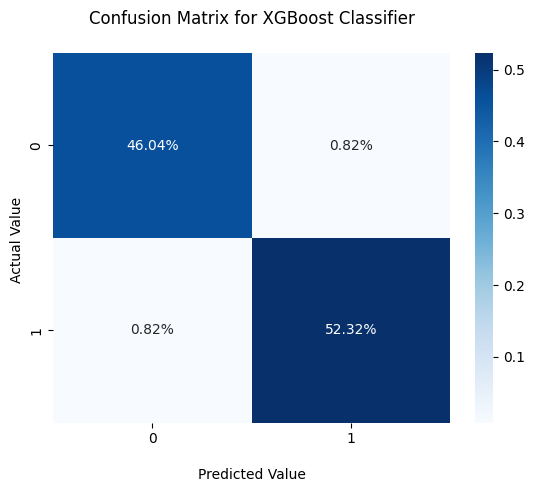

In [ ]:
y_pred_xgboost = xgboost_classifier.predict(X_test)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_xgboost)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for XGBoost Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()



In [ ]:
print(classification_report(y_test, y_pred_xgboost))

AdaBoost Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
acc_adaboost = round(adaboost_classifier.score(X_train, y_train) * 100, 2)
acc_adaboost

97.81

In [ ]:

acc_test_adaboost = round(adaboost_classifier.score(X_test, y_test) * 100, 2)
acc_test_adaboost

97.43

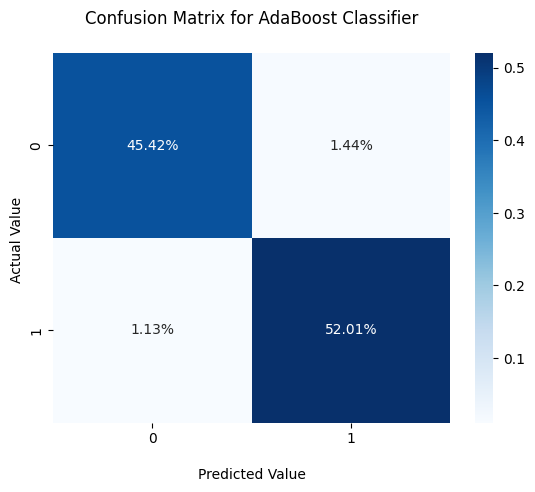

In [ ]:
y_pred_adaboost = adaboost_classifier.predict(X_test)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_adaboost)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for AdaBoost Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=3)

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search results
best_params = grid_search.best_params_
print(best_params)

# Initialize the AdaBoost classifier with the best hyperparameters
best_adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Train the classifier on the training data
best_adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_adaboost = best_adaboost_classifier.predict(X_test)


{'learning_rate': 0.1, 'n_estimators': 150}


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

acc_train_adaboost_par = round(best_adaboost_classifier.score(X_train, y_train) * 100, 2)
print(acc_train_adaboost_par)
acc_val_adaboost_par = round(best_adaboost_classifier.score(X_val, y_val) * 100, 2)
print(acc_val_adaboost_par)
acc_test_adaboost_par = round(best_adaboost_classifier.score(X_test, y_test) * 100, 2)
print(acc_test_adaboost_par)

precision = precision_score(y_test, y_pred_test_adaboost)
recall = recall_score(y_test, y_pred_test_adaboost)
f1 = f1_score(y_test, y_pred_test_adaboost)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



99.3
98.33
98.46
Precision: 0.9845261121856866
Recall: 0.9864341085271318
F1-score: 0.9854791868344627


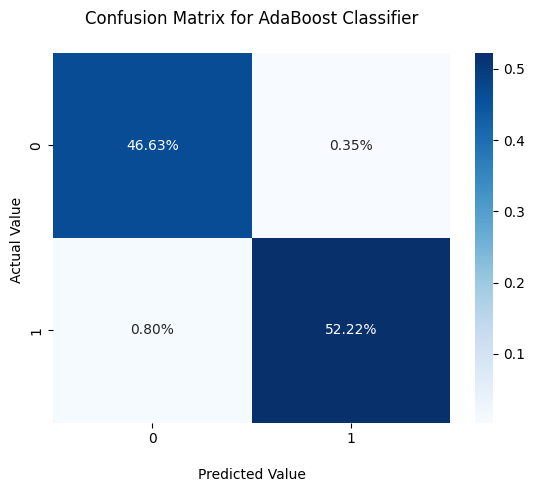

In [ ]:

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_adaboost)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for AdaBoost Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_adaboost))

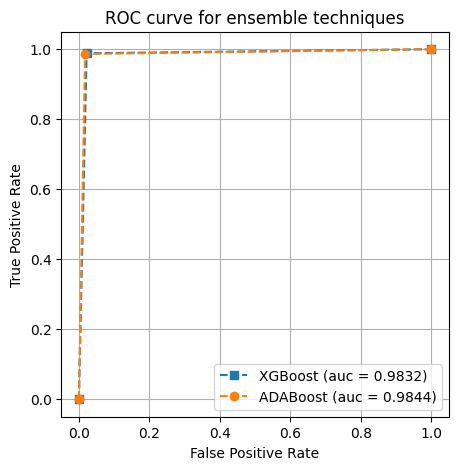

In [ ]:


rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_test_rf)
auc_rf = auc (rf_fpr, rf_tpr)

adaboost_fpr, adaboost_tpr, threshold = roc_curve(y_test, y_pred_test_adaboost)
auc_adaboost = auc (adaboost_fpr, adaboost_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_fpr, rf_tpr, marker='s',linestyle='--', label='XGBoost (auc = %0.4f)' % auc_rf)
plt.plot(adaboost_fpr, adaboost_tpr, marker='o',linestyle='--', label='ADABoost (auc = %0.4f)' % auc_adaboost)


plt.title('ROC curve for ensemble techniques')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [ ]:

model = Sequential()
model.add(Dense(88, input_dim =18, activation ="relu"))
model.add(Dense(88, activation = "relu"))
model.add(Dense(88, activation = "relu"))
model.add(Dense(88, activation = "relu"))
model.add(Dense(88, activation = "tanh"))
model.add(Dense(88, activation = "relu"))
model.add(Dense(88, activation = "tanh"))
model.add(Dense(88, activation = "relu"))
model.add(Dense(88, activation = "relu"))

model.add(Dense(1, activation ="sigmoid"))


In [ ]:
model.summary()

In [ ]:
model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

In [ ]:
history = model.fit(X_train, y_train,  epochs=200, batch_size=128, shuffle=True, validation_data =(X_test, y_test))

In [ ]:
#training accuracy average
eval_model=model.evaluate(X_train, y_train)
eval_model

In [ ]:
#Validation or test accuracy average
eval_model1=model.evaluate(X_test, y_test)
eval_model1

In [ ]:
y_pred= model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
neural_network_fpr, neural_network_tpr, threshold = roc_curve(y_test, y_pred)
auc_neural_network = auc (neural_network_fpr, neural_network_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(neural_network_fpr, neural_network_tpr, marker='.', label='Neural Network (auc = %0.2f)' % auc_neural_network)

plt.title('ROC curve for Malware PDF Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

Tuner Hyper Parameter Tuning


1.   Select the appropriate optimizer
2.   No of nodes in a layer
3.   select the best no of layers
4.   Make the best model combining all the models



In [ ]:
pip install -U keras-tuner

In [ ]:
import kerastuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation = 'relu', input_dim = 18))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = hp.Choice('optimizier', values = ['adam', 'sgd', 'adadelta'])
  model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials = 5,
)

In [ ]:
tuner.search(X_train, y_train, epochs = 50, validation_data=(X_test,y_test))


In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=5, validation_data=(X_test,y_test))

In [ ]:
def build_model(hp):
  model= Sequential()
  units = hp.Int('units', min_value=8,max_value=128,step=8)

  model.add(Dense(units=units, activation='relu', input_dim=18))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective= 'val_accuracy',
                        max_trials=5,
                        directory='pdf_malicious_dir')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=5, validation_data=(X_test,y_test))

Finding No of LAYERS

In [ ]:
def build_model(hp):
  model= Sequential()
  model.add(Dense(96,activation = 'relu', input_dim = 18))

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    model.add(Dense(96, activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 3,
    directory='pdf_malicious_dir',
    project_name='num_layers'
)

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model= tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, initial_epoch=5, validation_data=(X_test,y_test))

In [ ]:
y_pred= model.predict(X_test)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Tuning hyperparameters together


In [ ]:
from keras.layers.serialization import activation
def build_model(hp):
  model = Sequential()
  counter = 0

  for i in range(hp.Int('num_layers', min_value=1, max_value=10 )):
    if counter == 0:
      model.add(
          Dense(
              hp.Int('units' + str(i), min_value = 8, max_value = 128,step = 8),
              activation = hp.Choice('activation' + str (i), values=['relu', 'tanh', 'sigmoid']),
              input_dim=18
              )
          )
    else:
      model.add(
        Dense(
            hp.Int('units' + str(i), min_value = 8, max_value = 128,step = 8),
            activation = hp.Choice('activation' + str (i), values=['relu', 'tanh', 'sigmoid'])
          )
        )
    counter+=1


  #outside loop
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer = hp.Choice('optimizer', values=['rmsprop','adam', 'sgd', 'nadam', 'adadelta']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

  return model


In [ ]:

tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='my_dir',
                        project_name ='final2')

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train, epochs=200, batch_size=64 ,initial_epoch=5,validation_data=(X_test,y_test))

In [ ]:
y_pred= model.predict(X_test)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))